In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [16]:
meta_data = {
    1:{
        "name": "Changes in Consumer Price Indexes, 2021 through 2024",
        "desc": "The USDA’s Economic Research Service (ERS) provides data on food prices and forecasts changes up to 18 months in advance. These forecasts are based on the U.S. Department of Labor’s Consumer Price Index (CPI) and Producer Price Index (PPI) data. The CPI for food measures changes in retail food prices, while the PPI measures changes in prices paid to domestic producers. In addition to current monthly forecasts, the ERS also constructs a historical series of CPI and PPI forecasts. The ERS introduced a revised price forecasting methodology for the Food Price Outlook in January 2023.",
        "url":"https://storage.googleapis.com/myspaceapp/CPIForecast.csv",
        "source": "https://www.ers.usda.gov/data-products/food-price-outlook/",
        "dtype":"csv",
        "year":"2021"
    },
    2:{ "name": "Feed Grains Database",
        "url": "https://storage.googleapis.com/myspaceapp/FeedGrains.csv",
        "desc": "1. The ERS provides economic research and information to inform public and private decision making on economic and policy issues related to agriculture, food, natural resources, and rural development1. The dataset  contains information about the prices of various fruits in the year 2020. The ERS collects and analyzes data on various aspects of the U.S. agricultural industry, including fruit and nut markets1.",
        "source":"https://data.ers.usda.gov/FEED-GRAINS-custom-query.aspxm",
        "dtype":"csv",
        "year":"2019"
    },
    3:{ "name": "Fruit Prices",
        "url":"https://storage.googleapis.com/myspaceapp/Fruit%20Prices%202020.csv",
        "source":"https://www.ers.usda.gov/data-products/feed-grains-database/feed-grains-yearbook-tables/" ,
        "desc": "This data product contains statistics on four feed grains (corn, grain sorghum, barley, and oats), foreign coarse grains (feed grains plus rye, millet, and mixed grains), hay, and related items. This includes data published in the monthly Feed Outlook and previously annual Feed Yearbook. Data are monthly, quarterly, and/or annual depending upon the data series. Latest data may be preliminary or projected. Missing values indicate unreported values, discontinued series, or not yet released data. All data in the Feed Grains Yearbook tables will be also released each month through the Feed Grains Custom Query database at 12:00 the day after the release of WASDE. Users are able to download data from the database into Excel files.",
        "dtype":"csv",
        "year": "2023"
    },
    4:{ "name": "SSURGO 2.3.2 Data Dictionary",
        "url":"https://storage.googleapis.com/myspaceapp/SSURGO%202.3.2%20Data%20Dictionary_0.csv",
        "desc": "The dataset is a CSV version of the data dictionary1. It provides comprehensive information about the Soil Survey Geographic Database (SSURGO), including various soil properties and classifications. Please note that by default, the preview only displays up to 100 records.",
         "source":"https://data.nal.usda.gov/system/files/SSURGO%202.3.2%20Data%20Dictionary_0.csv",
         "dtype":"csv",
         "year": "2022"
    },
    5:{ "name": "A Global Database of Soil Respiration Data, Version 5.0",
        "url":"./data/srdb-studies-V5.csv",
        "desc": "The dataset is a CSV version of the data dictionary1. It provides comprehensive information about the Soil Survey Geographic Database (SSURGO), including various soil properties and classifications. Please note that by default, the preview only displays up to 100 records.",
         "source":"https://d3o6w55j8uz1ro.cloudfront.net/s3-d0f68fa49c8cba12794bb586349f2341/ornl-cumulus-prod-protected.s3.us-west-2.amazonaws.com/global_soil/SRDB_V5/data/srdb-studies-V5.csv?A-userid=orbit196&Expires=1696813644&Signature=RjkENaMOlmCmXUE1GqmYZAKLl4ndM43WYHHgt~03UwyYpaxRSZCahmQdsr6iZyXBUsj2vCvTc8dDZaCkgCGM~EQyPdMoMEE1Aip9DC9LLmmXh3FyVWQloxHFN-RNkTVwonjIUyndp8Bi~5np-7lDy~8LhAb-qxKQGgQWJq95eTcxmMUpV4HoRu73f9GqRQi4Cknjs3QdSBrpmgGh3s~UO1cptCYFx8ynHPjVJo9gDf5cvdmLgktTgLcQxG5TqsDMuH0kj7j013qeXvfEKsd6fdfjoexW5eATZb13jgzDISeSA8JMEVl8r0pZTmRriS6lBjKl2XsUz~E0V7LDNKnDJA__&Key-Pair-Id=K27CIBPNSS01WN",
         "desc":"This dataset is about the Global Agricultural Lands in the year 2000. It provides information on the extent and area of four types of agricultural lands: croplands, irrigated croplands, pasturelands, and rangelands. The dataset is derived from satellite imagery and other sources, and has a spatial resolution of 5 arc-minutes. The dataset is available in CSV format, and can be used for various applications such as land use planning, food security assessment, and environmental monitoring.",
         "dtype":"csv",
         "year": "2022"
    }
}

In [100]:
def download_data(url):
    df = pd.read_csv(url, encoding='ISO-8859-1')
    return df

def create_diagram(df_column,folder, fn, column):   
    plt.clf()
    fp = folder+fn
    if df_column.dtype == 'object':  # Categorical data
        counts = df_column.value_counts()
        top_five = counts[:4]
        other = pd.Series([counts[4:].sum()], index=['Other'])
        final_counts = pd.concat([top_five, other])
        plt.pie(final_counts, pctdistance=0.85) # , autopct='%1.1f%%')
        
        # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.axis('equal')
        plt.savefig(fp)
        
        legend = plt.legend(final_counts.index)

        # Save only the legend
        fig = legend.figure
        fig.canvas.draw()
        bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fn = folder+column+'-legend.png'
        fig.savefig(fn, dpi="figure", bbox_inches=bbox)



    else:  # Numerical data
        sns.histplot(df_column, bins=10)
        plt.savefig(fp)

def get_df_description(df):
    descriptions = df.describe()
    return descriptions

In [106]:
def create_sumary(folder,df):
    overview = pd.DataFrame()

    for column in df.columns:
        # Create a new DataFrame for this column
        column_df = pd.DataFrame()
        column_df['Column Name'] = [column]
        fn = column+".png"
        create_diagram(column=column, folder=folder,fn=fn, df_column=df[column])
        # Add image file path to DataFrame
        column_df['Visual'] = [f'<img src="{fn}" alt="{column} visual", height="150">']

        # Add summary statistics to DataFrame
        if df[column].dtype == 'object':  # Categorical data
            stats = f'<img src="{column+"-legend.png"}" alt="{column} legend", maxwidth="150">'
        else:  # Numerical data
            stats = str(df[column].describe())
            stats = stats.replace('\n', '<br>')
        
        # Replace newline characters with HTML line breaks
        
        column_df['Summary Statistics'] = [stats]
        
        # Append this column's DataFrame to the overview DataFrame
        overview = overview.append(column_df)

    # Convert overview DataFrame to HTML
    overview_fp = folder+"overview.html"
    overview_html = overview.to_html(escape=False, index=False)
    with open(overview_fp, 'w') as f:
        f.write(overview_html)

        
        # column_df['Visual'] = [f'<img src="{column}_visual.png" alt="{column} visual">']

/var/folders/qc/zxxkplk90xd364gg1c_mxn780000gn/T/ipykernel_6708/3996000676.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overview = overview.append(column_df)
/var/folders/qc/zxxkplk90xd364gg1c_mxn780000gn/T/ipykernel_6708/3996000676.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overview = overview.append(column_df)
/var/folders/qc/zxxkplk90xd364gg1c_mxn780000gn/T/ipykernel_6708/3996000676.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overview = overview.append(column_df)
/var/folders/qc/zxxkplk90xd364gg1c_mxn780000gn/T/ipykernel_6708/3996000676.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overview = overvie

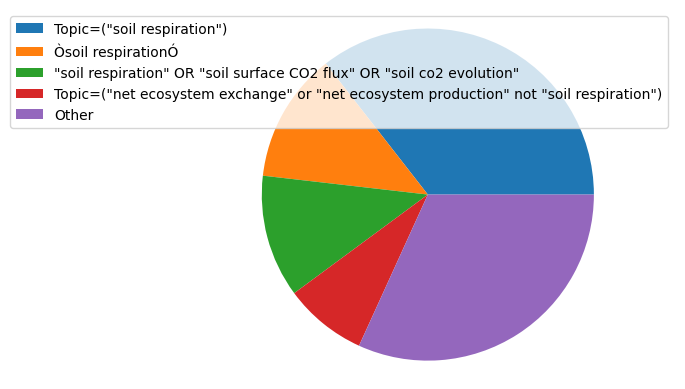

In [107]:
for file_id in [3,5]:
    folder = "./data/summary/"+str(file_id)+"/"
    df = meta_data[file_id]["url"] # 3 & 5
    df = download_data(df)
    create_sumary(folder=folder, df=df)

In [ ]:
meta_table = pd.DataFrame(meta_data)
meta_html = meta_table.to_html(escape=False)

In [109]:
with open('data/meta.json', 'w') as f:
    json.dump(meta_data, f )
